### Gradient descent algorithm for ridge regression

Running for 0.5
Running for 1.0
Running for 1.5
Running for 2.0
Running for 2.5
Running for 3.0
Running for 3.5
Running for 4.0
Running for 4.5
Running for 5.0
Running for 5.5
Running for 6.0
Running for 6.5
Running for 7.0
Running for 7.5
Running for 8.0
Running for 8.5
Running for 9.0
Running for 9.5
Running for 10.0
[ 1  2  0  4  5  3  6  7  8 11 10  9 14 15 13 16 18 12 19 17] 1.0
Using w_ml: r2 score: 0.8455, test error: 185.3637
Using w_ridge: r2 score: 0.8158, test error: 155.3971


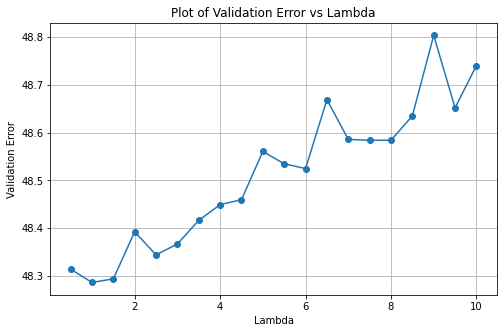

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

train_df = pd.read_csv("/content/A2Q2Data_train.csv", header=None);
train_data_set = train_df.iloc[:].values
train_features = train_data_set[:, :-1] # for all but last column
train_label = train_data_set[:, -1] # for last column

#Load test data
test_df = pd.read_csv("/content/A2Q2Data_test.csv", header=None);
test_data_set = test_df.iloc[:].values
test_features = test_data_set[:, :-1] # for all but last column
test_label = test_data_set[:, -1] # for last column

#Hyper parameters
lr = 0.001 #learning rate
epochs = 10000
num_folds = 10

def get_W_ml(X, y):
  XtX = np.matmul(X.T, X)

  XtX_inverse = np.linalg.inv(XtX)
  W_ml = np.matmul(np.matmul(XtX_inverse, X.T), y)

  return W_ml

def ridge_regression(train_X, train_y, lambda_penality) :

  num_data_points = train_X.shape[0]
  num_features = train_X.shape[1]

  train_XtX = np.matmul(train_X.T, train_X)
  W = np.zeros((num_features))
  for i in np.arange(epochs):

    grad_f = ( 2*(np.matmul(train_XtX, W) - np.matmul(train_X.T, train_y)) + 2*lambda_penality*W  ) / num_data_points  
    next_W = W - lr * grad_f
    W = next_W

  return W

def k_fold_validation(dataset, lambda_penality):
  
  dataset_copy = dataset.copy()
  np.random.shuffle(dataset_copy)
  folds = np.split(dataset_copy, num_folds, axis = 0)

  avg_err_all = []
  for i in range(num_folds):
    
    testset = folds[i].copy()

    initialized = False
    for j in range(num_folds):
      if j == i:
        continue
      
      if initialized == False:
        trainset = folds[j].copy()
        initialized = True
      else:
        trainset = np.concatenate((trainset, folds[j]), axis=0)
    
    train_X = trainset[:, :-1]
    train_y = trainset[:, -1]
    model = ridge_regression(train_X, train_y, lambda_penality)

    test_X = testset[:, :-1]
    test_y = testset[:, -1]

    #print(r2_score(test_y, np.matmul(test_X, model)))
    err = np.matmul(test_X, model) - test_y
    avg_err_all.append(np.dot(err,err))

  return np.average(avg_err_all)

W_ml = get_W_ml(train_features, train_label)

#perfrom K fold cross validation
err_all = []
penalties = np.arange(0.5, 10.5, 0.5)
for lambda_penality in penalties:
  print('Running for ' + str(lambda_penality))
  error = k_fold_validation(train_data_set, lambda_penality)
  err_all.append(error)

#Get best lambda
sorted_index = np.argsort(err_all)
sorted_penalties = penalties[sorted_index]

print(sorted_index, sorted_penalties[0])

#Get W_r for best lambda
W_r = ridge_regression(train_features, train_label, sorted_penalties[0])

#Calculate error for test data using W_ml & W_ridge
w_ml_err_vector = np.matmul(test_features, W_ml) - test_label
w_ridge_err_vector = np.matmul(test_features, W_r) - test_label

w_ml_err = np.dot(w_ml_err_vector, w_ml_err_vector)
w_ridge_err = np.dot(w_ridge_err_vector, w_ridge_err_vector)

print('Using w_ml: r2 score: %.4f, test error: %.4f'%(r2_score(train_label, np.matmul(train_features, W_ml)), w_ml_err))
print('Using w_ridge: r2 score: %.4f, test error: %.4f'%(r2_score(train_label, np.matmul(train_features, W_r)), w_ridge_err))

plt.figure(figsize=(8, 5))
plt.plot(penalties, err_all, 'o-')
plt.title('Plot of Validation Error vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('Validation Error')
plt.grid()
plt.show()

In [ ]:
w_ml_err_vector_train = np.matmul(train_features, W_ml) - train_label
w_ridge_err_vector_train = np.matmul(train_features, W_r) - train_label

w_ml_err_train = np.dot(w_ml_err_vector_train, w_ml_err_vector_train)
w_ridge_err_train = np.dot(w_ridge_err_vector_train, w_ridge_err_vector_train)

print('W_ml train error: %.3f, W_r train error: %.3f'%(w_ml_err_train, w_ridge_err_train))

W_ml train error: 396.864, W_r train error: 473.030
